In [ ]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use("fivethirtyeight")

In [ ]:
ativos = ["VALE3.SA","FLRY3.SA","ITSA4.SA","JBSS3.SA","BBAS3.SA"]

In [ ]:
dataInicio = "2016-01-01"
dataFim = datetime.today().strftime("%Y-%m-%d")

In [ ]:
df = pd.DataFrame()

for ativo in ativos:
  df[ativo] = web.DataReader(ativo, data_source="yahoo", start=dataInicio, end=dataFim)["Adj Close"]

In [ ]:
df

,VALE3.SA,FLRY3.SA,ITSA4.SA,JBSS3.SA,BBAS3.SA
Date,,,,,
2016-01-04,11.309562,5.764288,3.999628,11.152088,11.706713
2016-01-05,11.158054,5.832327,4.066288,10.596796,11.747819
2016-01-06,10.338134,5.802087,4.102647,9.625038,11.747819
2016-01-07,9.723193,5.809646,4.042049,10.180329,11.468301
2016-01-08,9.393443,5.832327,4.042049,10.365424,11.468301
...,...,...,...,...,...
2020-06-22,55.000000,24.799999,10.150000,21.650000,33.240002
2020-06-23,55.590000,25.150000,10.060000,21.530001,33.529999
2020-06-24,55.389999,24.559999,9.770000,21.830000,32.220001


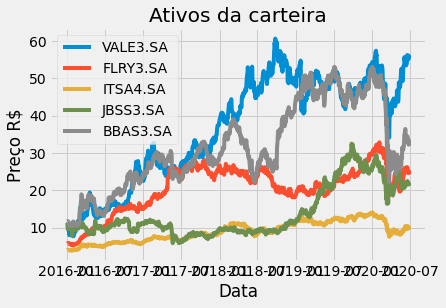

In [ ]:
titulo = "Ativos da carteira"
carteiraTeste = df

for i in carteiraTeste.columns.values:
  plt.plot(carteiraTeste[i], label=i)

plt.title(titulo)
plt.xlabel("Data")
plt.ylabel("Preço R$")
plt.legend(carteiraTeste.columns.values)
plt.show()

In [ ]:
retornoDia = df.pct_change()
retornoDia

,VALE3.SA,FLRY3.SA,ITSA4.SA,JBSS3.SA,BBAS3.SA
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.013396,0.011804,0.016666,-0.049793,0.003511
2016-01-06,-0.073482,-0.005185,0.008942,-0.091703,0.000000
2016-01-07,-0.059483,0.001303,-0.014770,0.057692,-0.023793
2016-01-08,-0.033914,0.003904,0.000000,0.018182,0.000000
...,...,...,...,...,...
2020-06-22,-0.003081,-0.012346,-0.024976,-0.031753,-0.020625
2020-06-23,0.010727,0.014113,-0.008867,-0.005543,0.008724
2020-06-24,-0.003598,-0.023459,-0.028827,0.013934,-0.039069


In [ ]:
matrixCovariancia = retornoDia.cov() * 252
matrixCovariancia

,VALE3.SA,FLRY3.SA,ITSA4.SA,JBSS3.SA,BBAS3.SA
VALE3.SA,0.251188,0.044752,0.060572,0.065129,0.094733
FLRY3.SA,0.044752,0.120095,0.049479,0.051821,0.075514
ITSA4.SA,0.060572,0.049479,0.107491,0.056604,0.125911
JBSS3.SA,0.065129,0.051821,0.056604,0.328742,0.085820
BBAS3.SA,0.094733,0.075514,0.125911,0.085820,0.233867


In [ ]:
#Otimização
!pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt import cla

In [ ]:
media = expected_returns.mean_historical_return(carteiraTeste)
s = risk_models.sample_cov(carteiraTeste)

In [ ]:
#Markowitz
cla = cla.CLA(media, s)

#Escolha entre miníma volatilidade ou carteira ideal
#pesos = cla.max_sharpe()
pesos = cla.min_volatility()

clean_weights = cla.clean_weights()
print("Pesos: ", clean_weights)
cla.portfolio_performance(verbose=True, risk_free_rate=0.0225)

Pesos:  OrderedDict([('VALE3.SA', 0.11191), ('FLRY3.SA', 0.38318), ('ITSA4.SA', 0.42972), ('JBSS3.SA', 0.07518), ('BBAS3.SA', 0.0)])
Expected annual return: 33.5%
Annual volatility: 27.6%
Sharpe Ratio: 1.13


(0.33479385241737186, 0.27601628494397584, 1.131432706880898)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

ultimosPrecos = get_latest_prices(carteiraTeste)
pesos = clean_weights
valorPortifolio = 5000
da = DiscreteAllocation(pesos, ultimosPrecos, valorPortifolio)

alocado, resto = da.lp_portfolio()
print("Qtd de cotas: ", alocado)
print("Resto (R$):", resto)

Qtd de cotas:  {'VALE3.SA': 10.0, 'FLRY3.SA': 79.0, 'ITSA4.SA': 221.0, 'JBSS3.SA': 18.0}
Resto (R$): 3.259990692138672


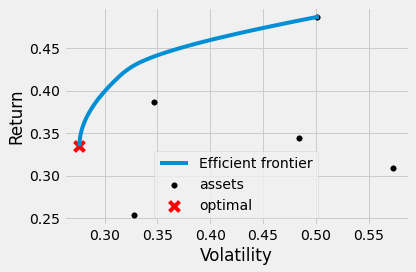

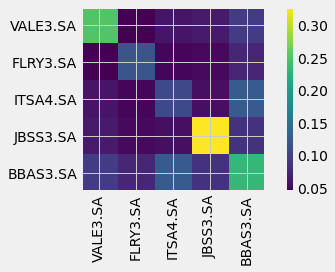

In [ ]:
#PLOTTING
plotting.plot_efficient_frontier(cla)
plotting.plot_covariance(matrixCovariancia)